In [97]:
import os
import cv2
import torch
import torch.nn as nn
import torchvision
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
batch_size = 8

captions_path = 'text_c10'
img_name_path = 'images.txt'
data_path = 'images/'

In [105]:
class DataLoader:
    def __init__(self):
        self.device = device
        self.batch_size = batch_size
        self.data_path = data_path
        name_id = open(img_name_path).read().splitlines()
        name2id_train = {}
        id2name_train = {}
        name2id_test = {}
        id2name_test = {}
        for index, img in enumerate (name_id):
            if(len(name2id_train) < 9430):
                name2id_train[img.split(' ')[1]] = img.split(' ')[0]
                id2name_train[img.split(' ')[0]] = img.split(' ')[1]
            else:
                name2id_test[img.split(' ')[1]] = img.split(' ')[0]
                id2name_test[img.split(' ')[0]] = img.split(' ')[1]
       
        id2caption_train = {}
        id2caption_test = {}
        
        for name in name2id_train:
            txt_name = '.'.join(name.split('.')[0:-1]) + '.txt'
            txt_path = os.path.join(captions_path, txt_name)
            idx = name2id_train[name]
            id2caption_train[idx] = open(txt_path).read().splitlines()
        
        for name in name2id_test:
            txt_name = '.'.join(name.split('.')[0:-1]) + '.txt'
            txt_path = os.path.join(captions_path, txt_name)
            idx = name2id_test[name]
            id2caption_test[idx] = open(txt_path).read().splitlines()
        
        self.name2id_train = name2id_train
        self.id2name_train = id2name_train
        self.name2id_test = name2id_test
        self.id2name_test = id2name_test
        
        self.id2caption_train = id2caption_train
        self.id2caption_test = id2caption_test
        
        self.data_transforms = torchvision.transforms.Compose([
                torchvision.transforms.Resize([256, 256]),
#                 torchvision.transforms.CenterCrop(256),
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
            ])
        
    def load_img(self, image_name):
        image = Image.open(image_name)
        image = self.data_transforms(image).float()
        image = torch.autograd.Variable(image, requires_grad=False)
        image = image.unsqueeze(0)
        return image[0].to(device)
    
    def imshow(self, img):
        img = img / 2 + 0.5     # unnormalize
        npimg = img.cpu().detach().numpy()
        plt.figure(figsize = (5,5))
        plt.imshow(np.transpose(npimg, (1, 2, 0)), aspect='auto')
    
    def get_data(self, train=True):
        if train == True:
            images = self.id2name_train
            lb = self.id2caption_train
        else:
            images = self.test_id2name_test
            lb = self.id2caption_test
        while True:
            ix = np.random.choice(np.arange(len(images)), self.batch_size)
            x = []
            y = []
            for i in ix:
#                 print(images[str(i)])
                x.append(self.load_img(self.data_path + images[str(i)]))
                y.append(lb[str(i)])
            yield torch.stack(x), y
            
loader = DataLoader()
x, y = next(loader.get_data(True))

078.Gray_Kingbird/Gray_Kingbird_0006_70268.jpg
117.Clay_colored_Sparrow/Clay_Colored_Sparrow_0001_110632.jpg
004.Groove_billed_Ani/Groove_Billed_Ani_0109_1592.jpg
025.Pelagic_Cormorant/Pelagic_Cormorant_0032_23570.jpg
101.White_Pelican/White_Pelican_0075_96422.jpg
067.Anna_Hummingbird/Anna_Hummingbird_0027_55873.jpg
011.Rusty_Blackbird/Rusty_Blackbird_0109_6698.jpg
026.Bronzed_Cowbird/Bronzed_Cowbird_0017_24019.jpg


torch.Size([3, 256, 256])
['a large sized white bird with a very large orange thick beak', 'this large bird that has a white body, and a orange throat', "the bird has a very large bill that's orange in color as well as a white throat, side and coverts.", 'a large white bird with a large orange bill and small red eyes.', 'the bird has a large yellow/orange beak with white covering the rest of its body.', 'this bird is white with red and has a long, pointy beak.', 'the bird has a massive yellow bill that is deep, a long throat and white back.', 'this large, primarily white bird has a distinctive large orange, pouch-shaped bill.', 'this bird has a huge orange bill, and has a mostly white body.', 'a large bird with a white neck and a large yellow bill.']


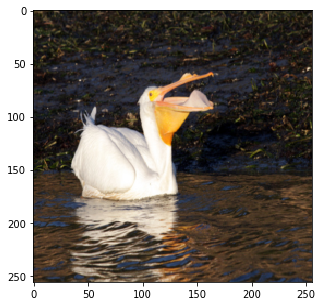

In [106]:
print(x[0].shape)
loader.imshow(x[4])
print(y[4])